In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
network = pd.read_table("breast_correlation_v2.txt", sep='\t', header=None, names=['src', 'dest', 'r', 'p'])
network.head()

,src,dest,r,p
0,A1BG,ZNF497,0.6146,0.0
1,A2M,PZP,0.4403,0.0
2,A2ML1,KLF14,0.2452,0.0
3,AAAS,TARBP2,0.7445,0.0
4,AAMP,DNAJB2,0.7172,0.0


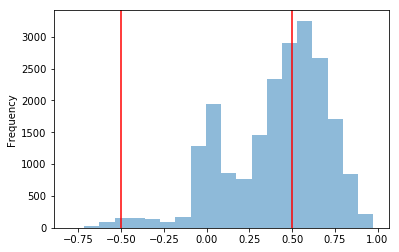

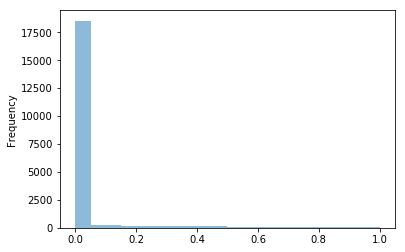

In [84]:
plt.figure()
network.r.plot.hist(alpha=0.5, bins=20)
plt.axvline(x=0.5, color='red')
plt.axvline(x=-0.5, color='red')
plt.show()

plt.figure()
network.p.plot.hist(alpha=0.5, bins=20)
plt.show()

In [19]:
print network.shape
print network[network.r >= 0.5].shape

(21029, 4)
(9661, 4)


In [115]:
def print_stat(network):
    src_nodes = set(np.unique(network.src.values))
    dest_nodes = set(np.unique(network.dest.values))
    print "number of all nodes: " + str(len(src_nodes | dest_nodes))
    print "number of src nodes: " + str(np.unique(network.src.values).shape[0])
    print "number of dest nodes: " + str(np.unique(network.dest.values).shape[0])
    print "number of src_nodes - dest_nodes: " + str(len(src_nodes - dest_nodes))
    print "number of dest_nodes - src_nodes: " + str(len(dest_nodes - src_nodes))
    print "number of all edges: " + str(network.shape[0])


In [82]:
network_cutoff5 = network[abs(network.r) > 0.5]
print_stat(network_cutoff5)

number of all nodes: 7336
number of src nodes: 3771
number of dest nodes: 6746
number of src_nodes - dest_nodes: 590
number of dest_nodes - src_nodes: 3565
number of all edges: 9837


In [80]:
# construct graph
G = nx.DiGraph()
for idx, row in network_cutoff5.iterrows():
    G.add_edge(row.src, row.dest, corr=row.r, pval=row.p)

In [81]:
nx.number_weakly_connected_components(G)

162

In [71]:
nx.is_directed_acyclic_graph(G)

True

In [72]:
nx.isolates(G)

[]

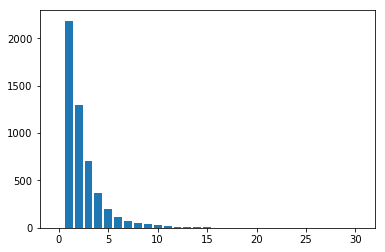

In [73]:
plt.figure()
plt.bar(range(len(nx.degree_histogram(G))), nx.degree_histogram(G))
plt.show()

In [74]:
print nx.is_strongly_connected(G)
print nx.number_strongly_connected_components(G)
print nx.is_semiconnected(G)

False
5107
False


In [75]:
network_cutoff5.to_csv("breast_cancer_correlation_cutoff_0_6", sep='\t')

In [103]:
deep_input = pd.read_table('deep_input_c3_pert_v2LogN', sep='\t', header=0)

In [110]:
#deep_input = deep_input.loc[:, ['Gene:Cell', 'T/F']]
#deep_input_tmp = deep_input['Gene:Cell'].str.split(':', expand=True)
#deep_input = pd.concat([deep_input_tmp, deep_input['T/F']], axis=1)
#deep_input
deep_input.columns = ['gene', 'cell', 'label']
deep_input.head()

,gene,cell,label
0,NAT1,MDAMB453,1
1,NAT2,HCC1008,1
2,NAT2,HCC2185,1
3,NAT2,HCC2688,1
4,NAT2,MDAMB453,1


In [111]:
true_df = deep_input[deep_input.label == 1]
true_df

,gene,cell,label
0,NAT1,MDAMB453,1
1,NAT2,HCC1008,1
2,NAT2,HCC2185,1
3,NAT2,HCC2688,1
4,NAT2,MDAMB453,1
6,NAT2,SUM52,1
7,AAMP,LY2,1
9,ABL1,MDAMB453,1
12,ACAT1,DU4475,1
13,ACAT1,MDAMB231,1


In [112]:
ess_genes = np.unique(true_df.gene.values)
ess_genes.shape

(1050,)

In [116]:
print_stat(network)

number of all nodes: 11081
number of src nodes: 5778
number of dest nodes: 10918
number of src_nodes - dest_nodes: 163
number of dest_nodes - src_nodes: 5303
number of all edges: 21029


In [127]:
truefalse = np.zeros(network.shape[0], dtype=np.int32)
truefalse.shape

(21029,)

In [128]:
for idx, row in network.iterrows():
    if row.src in ess_genes:
        truefalse[idx]=1

truefalse[:20]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [129]:
network['src_ess'] = truefalse

In [130]:
network.head()

,src,dest,r,p,src_ess
0,A1BG,ZNF497,0.6146,0.0,0
1,A2M,PZP,0.4403,0.0,0
2,A2ML1,KLF14,0.2452,0.0,0
3,AAAS,TARBP2,0.7445,0.0,0
4,AAMP,DNAJB2,0.7172,0.0,1


In [132]:
network[network['src'] == 'AAMP']

,src,dest,r,p,src_ess
4,AAMP,DNAJB2,0.7172,0.0,1
5,AAMP,DNPEP,0.5801,0.0,1
6,AAMP,FAM134A,0.5438,0.0,1
7,AAMP,IMP4,0.5344,0.0,1
8,AAMP,RNF25,0.5951,0.0,1


In [133]:
network.to_csv('breast_cancer_corr_essential_marked', sep='\t')

In [136]:
f4 = pd.read_table('clusters/mini_f4.txt', sep='\t', header=None, names=['gene', 'unknown'])
set(f4.gene.values) & set(network.src.values)

{'DLD',
 'GART',
 'GMPS',
 'GORASP2',
 'NDUFS1',
 'PSMC2',
 'PSMD13',
 'RHEB',
 'UQCRFS1',
 'YKT6'}

In [139]:
cluster24 = np.zeros(network.shape[0], dtype=np.int32)
for idx, row in network.iterrows():
    if (row.src in f4.gene.values) or (row.src in ['TUBA1B', 'TUBA1C']):
        cluster24[idx]=1
network['clust_c2f4'] = cluster24
network[network['clust_c2f4'] == 1]

,src,dest,r,p,src_ess,clust_c2f4
4537,DLD,RINT1,0.6362,0.0,0,1
6238,GART,DSCR3,0.5518,0.0,0,1
6239,GART,UBQLN4,0.3755,0.0,0,1
6488,GMPS,CSE1L,0.5737,0.0,1,1
6489,GMPS,GART,0.6315,0.0,1,1
6490,GMPS,KPNA4,0.6994,0.0,1,1
6491,GMPS,MCCC1,0.5428,0.0,1,1
6492,GMPS,PLCH1,0.5441,0.0,1,1
6493,GMPS,TFDP2,0.5245,0.0,1,1
6494,GMPS,TMEM41A,0.4406,0.0,1,1


In [140]:
network.to_csv('breast_cancer_corr_c2f4_marked', sep='\t')

In [ ]:
for f in range(1, 6):
    df_f = pd.read_table('clusters/mini_f{0}.txt'.format(i), sep='\t', header=None, names=['gene', 'unknown'])
    print set(dff.gene.values) & set(network.src.values)
    cluster = np.zeros(network.shape[0], dtype=np.int32)
    for idx, row in network.iterrows():
        if (row.src in df.gene.values) or (row.src in ['TUBA1B', 'TUBA1C']):
            cluster[idx]=1
    network['clust_c2f2'] = cluster22
    network[network['clust_c2f2'] == 1]
    network.to_csv('breast_cancer_corr_c2f2_marked', sep='\t')